<a href="https://colab.research.google.com/github/shimshimee/class2021Fall/blob/main/20211122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phasor**

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [3]:
# parameter setting
amp = 1             # 진폭이 -1에서 1까지
sr = 10000          # 하나의 sample은 1/10000초
dur = 0.5
freq = 100.0        # 1초에 cycle(태극문양)이 100개
phase = np.pi/2     # 90도에서 시작

In [4]:
# generate samples
nSamp = sr * dur                # sample이 5000개
samples = np.arange(1, nSamp+1)

In [5]:
# convert samples to time
t = samples/sr      # 1/10000초부터 5000/10000초까지

In [10]:
# convert time to angle in radian
theta0 = t * 2*np.pi * freq     # 0....1 * 2pi ---> 0....2pi (한 바퀴)

In [11]:
# shift angle by phase
theta = theta0 + phase

In [12]:
# generate signal by sin-phasor
s = amp * np.sin(theta)

Text(0, 0.5, 'real')

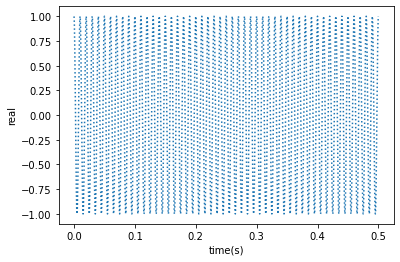

In [13]:
# plot the entire signal
plt.plot(t, s, ':')
plt.xlabel('time(s)')
plt.ylabel('real')

# t 대신 theta가 들어가면 그래프는 그대로지만 x축이 angle(radian)임

Text(0, 0.5, 'real')

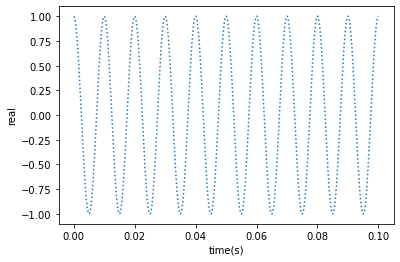

In [15]:
# plot a certain of signals
sampleRng = np.arange(0,1000)
plt.plot(t[sampleRng], s[sampleRng], ':')
plt.xlabel('time(s)')
plt.ylabel('real')

In [16]:
ipd.Audio(s, rate=10000)

In [32]:
def phasor_sine(amp, sr, dur, freq, phase):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  s = amp * np.sin(theta)
  return s, t, theta

In [31]:
amp = 1; sr = 10000; dur = 1; freq = 440; phase = 0
s, t, theta = phasor_sine(amp, sr, dur, freq, phase)
ipd.Audio(s, rate=sr)

In [29]:
amp = 1; sr = 10000; phase = 0
A = 440.00
C = 523.25
F = 698.46
D = 587.33
E = 659.25
Eb = 622.25
F = 698.46
G = 783.99
Bb = 932.333

In [35]:
s, t, theta = phasor_sine(amp, sr, 0.25, F, phase)
s_all = np.empty(0)
s_all = np.concatenate((s_all, s))

s, t, theta = phasor_sine(amp, sr, 1, D, phase)
s_all = np.concatenate((s_all, s))

# 이 과정을 반복하지 않기 위해 아래 함수로 만듦

In [38]:
notes = [F, D]
durs = [0.25, 0.75]

In [40]:
s_all = np.empty(0)

for note, dur in zip(notes, durs):
  s, t, th = phasor_sine(amp, sr, dur, note, phase)
  s_all = np.concatenate((s_all, s))

In [41]:
ipd.Audio(s_all, rate=sr)